<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/AnormalHavaOlaylar%C4%B1veAnomali_Tespiti_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

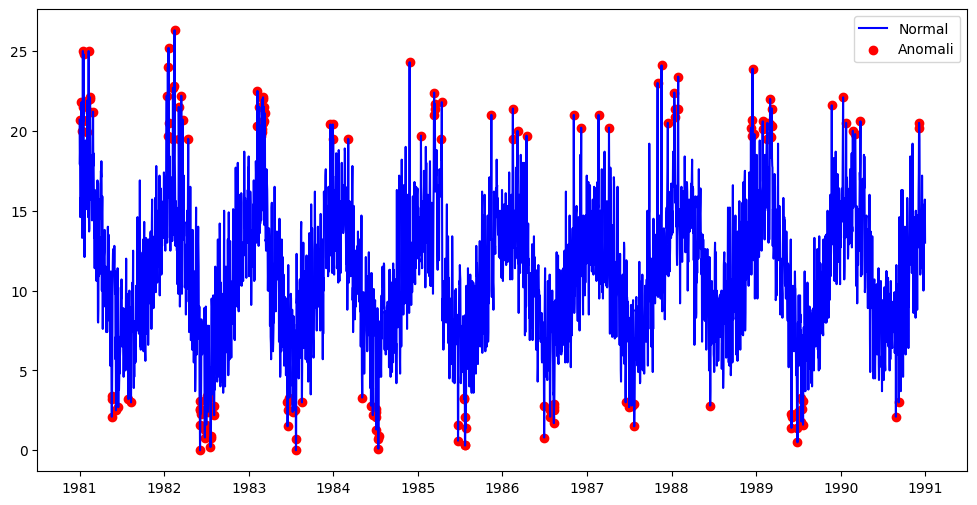

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Örnek veri yükleme (Kaggle'dan CSV dosyası yüklenebilir)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Anomali tespiti (Isolation Forest)
model = IsolationForest(contamination=0.05)  #%5 anomali varsayımı
data['anomaly'] = model.fit_predict(data[['Temp']])

# Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temp'], color='blue', label='Normal')
plt.scatter(data[data['anomaly'] == -1].index,
            data[data['anomaly'] == -1]['Temp'],
            color='red', label='Anomali')
plt.legend()
plt.show()

1. Farklı Anomali Tespit Yöntemlerini Deneyelim
A) Z-Skor (İstatistiksel Yöntem)
Z-Skor ile aykırı değerleri tespit edebiliriz:

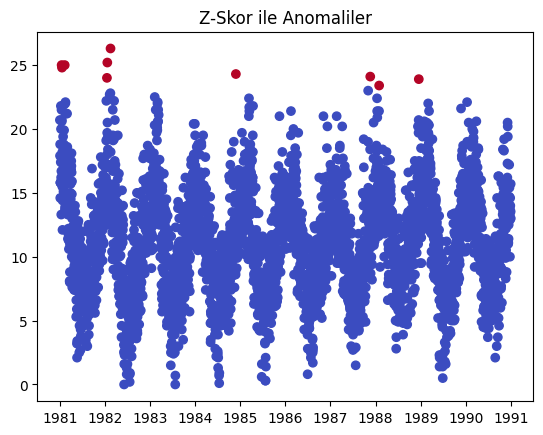

In [ ]:
from scipy import stats

# Z-Skor hesapla (|Z| > 3 ise anomali kabul et)
data['z_score'] = np.abs(stats.zscore(data['Temp']))
data['anomaly_z'] = data['z_score'] > 3

# Görselleştirme
plt.scatter(data.index, data['Temp'], c=data['anomaly_z'], cmap='coolwarm')
plt.title('Z-Skor ile Anomaliler')
plt.show()

B) Moving Average (Hareketli Ortalama)
Zaman serisinde hareketli ortalama ile sapmaları bulma

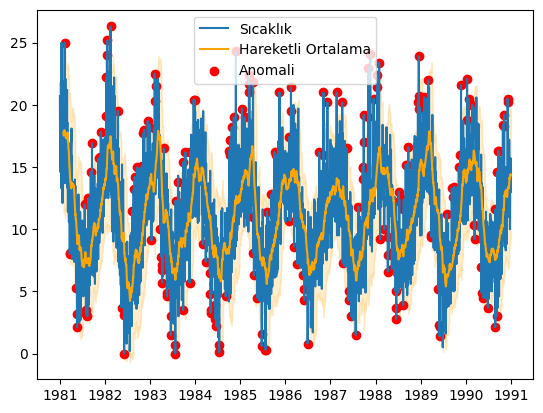

In [ ]:
window_size = 30
data['moving_avg'] = data['Temp'].rolling(window=window_size).mean()
data['moving_std'] = data['Temp'].rolling(window=window_size).std()
data['anomaly_ma'] = np.abs(data['Temp'] - data['moving_avg']) > 2 * data['moving_std']

# Görselleştirme
plt.plot(data['Temp'], label='Sıcaklık')
plt.plot(data['moving_avg'], label='Hareketli Ortalama', color='orange')
plt.fill_between(data.index,
                data['moving_avg'] - 2*data['moving_std'],
                data['moving_avg'] + 2*data['moving_std'],
                color='orange', alpha=0.2)
plt.scatter(data[data['anomaly_ma']].index,
            data[data['anomaly_ma']]['Temp'],
            color='red', label='Anomali')
plt.legend()
plt.show()

2. Derin Öğrenme ile Anomali Tespiti (LSTM Autoencoder)
Daha karmaşık modeller denemek isterseniz:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler

# Veriyi normalize et
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Temp']].values)

# LSTM Autoencoder modeli oluştur
model = Sequential([
    LSTM(64, activation='relu', input_shape=(30, 1)),
    RepeatVector(30),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])
model.compile(optimizer='adam', loss='mse')

# Modeli eğit (basit bir örnek)
# Not: Gerçek uygulamada daha fazla veri ve epoch gerekir
X = scaled_data[:-30]
y = scaled_data[30:]
model.fit(X, y, epochs=10, batch_size=32)

# Anomalileri tespit et (reconstruction error'a göre)


3. Coğrafi Veri Görselleştirme (Harita Üzerinde)
Eğer konum bilgisi içeren bir veri setiniz varsa:

Uzun Vadeli Trendler:



<Axes: title={'center': 'Yıllık Ortalama Sıcaklık Trendi'}, xlabel='year'>

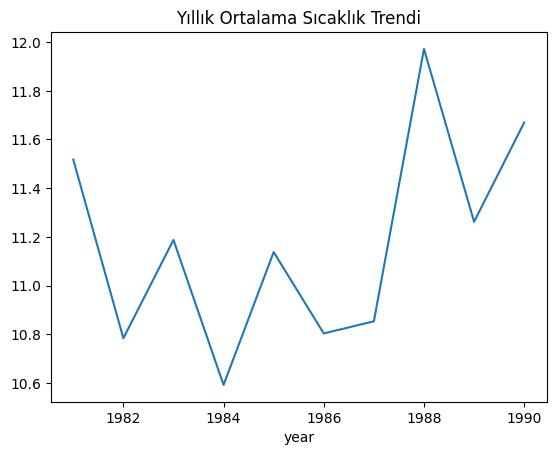

In [ ]:
data['year'] = data.index.year
yearly_avg = data.groupby('year')['Temp'].mean()
yearly_avg.plot(title='Yıllık Ortalama Sıcaklık Trendi')

Mevsimsel Ayrıştırma:



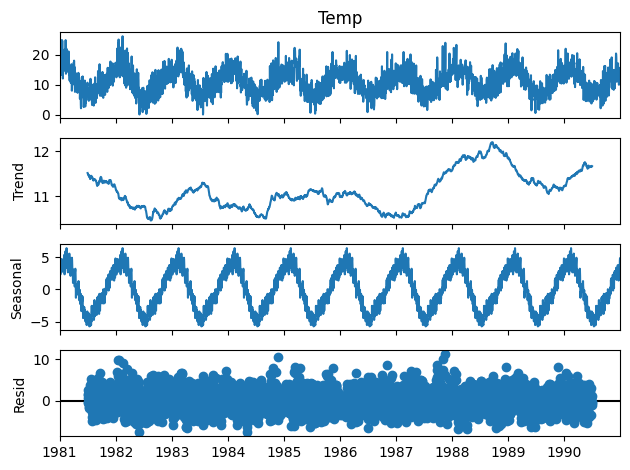

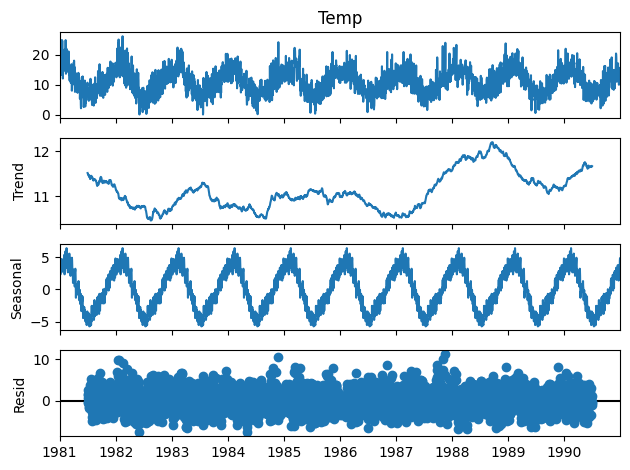

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Temp'], model='additive', period=365)
result.plot()